<a href="https://colab.research.google.com/github/ai7dnn/2024-1-BDA/blob/main/inclass/01w_lect_ch01_bigdata_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **빅데이터분석프로그래밍**

## 01주 2024-03

## 파이썬 설치 확인

In [ ]:
import sys
sys.version

'3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]'

In [ ]:
import site
site.getsitepackages()

['/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.10/dist-packages']

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns

print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.25.2
2.0.3
0.13.1


## 코랩에서 한글 처리

In [3]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 23.7 MB/s eta 0:00:00


## 그래프 해상도 설정

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi' : '100'})

In [1]:
# 해상도 선명하게
%config InlineBackend.figure_format = 'retina'

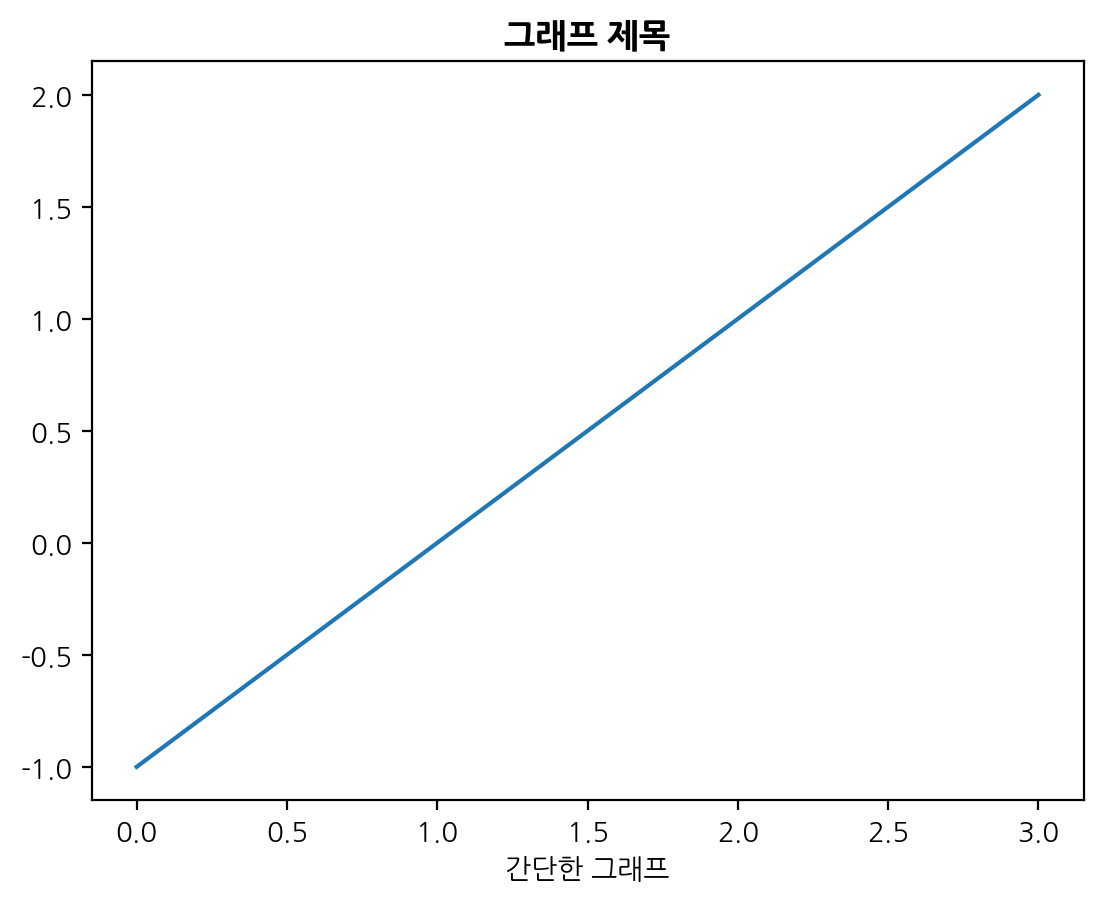

In [4]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.plot([-1, 0, 1, 2])
plt.title('그래프 제목', fontweight="bold")
plt.xlabel('간단한 그래프')
plt.show()

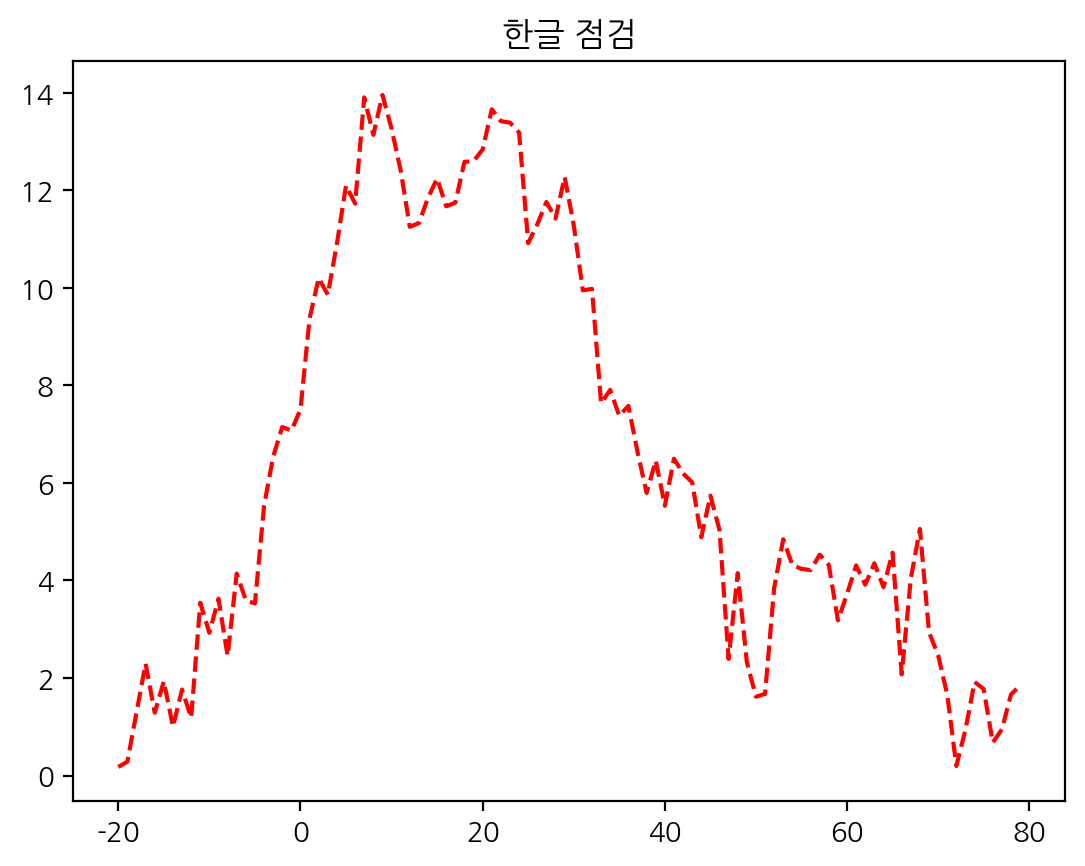

In [8]:
plt.plot(range(-20, 80), np.random.randn(100).cumsum(), 'r--')
plt.title('한글 점검');

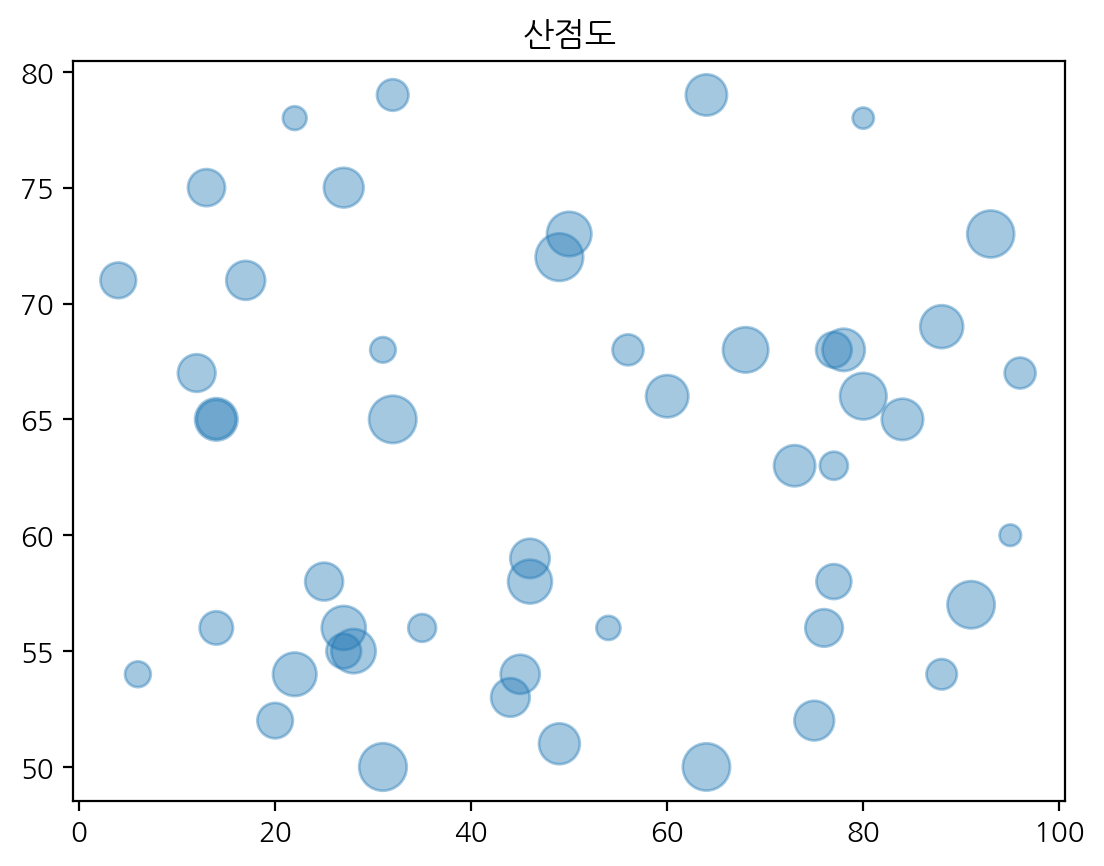

In [9]:
x = np.random.randint(1, 100, 50)
y = np.random.randint(50, 80, 50)
s = np.random.randint(50, 300, 50)

plt.scatter(x, y, s=s, alpha=.4)
plt.title('산점도');

## seaborn data vis

In [10]:
import seaborn as sns

In [11]:
var = ['a', 'a', 'b', 'c']
var

['a', 'a', 'b', 'c']

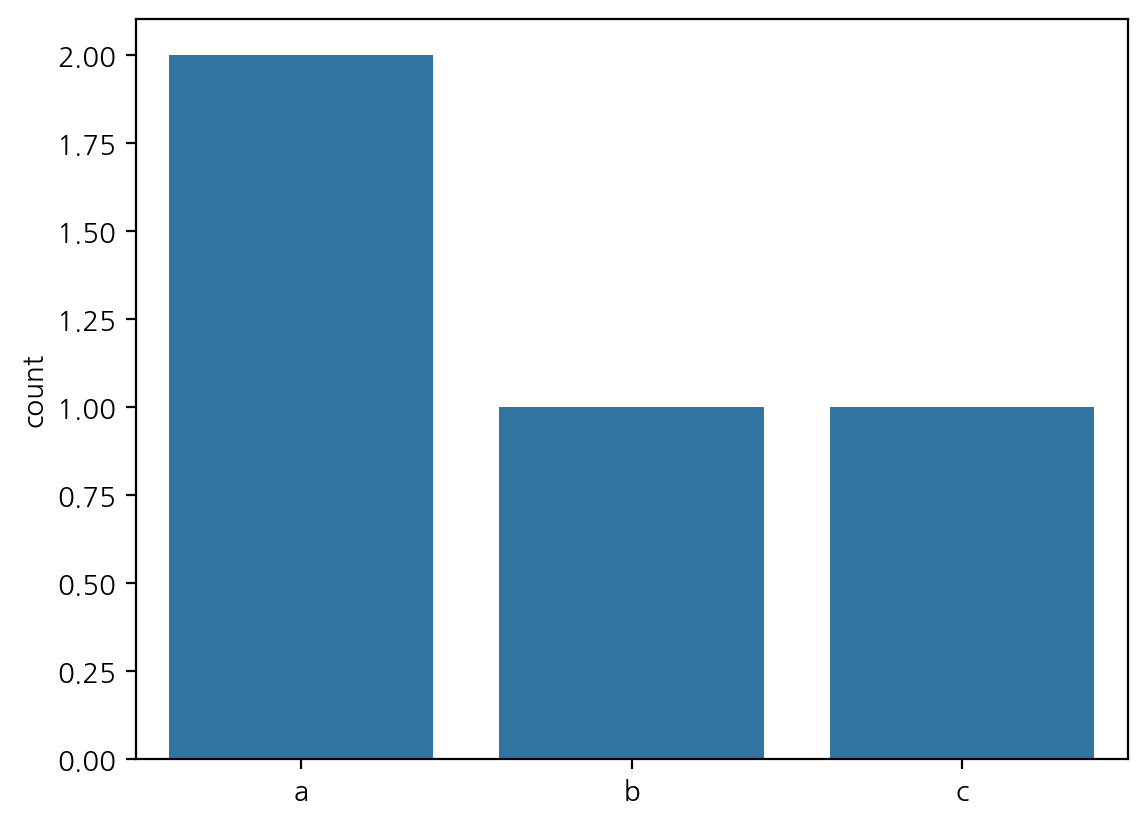

In [12]:
sns.countplot(x = var);

## 데이터분석을 위한 샘플 데이터

In [15]:
import seaborn as sns

In [16]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [17]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [18]:
titanic.who.unique()

array(['man', 'woman', 'child'], dtype=object)

In [19]:
titanic.who.value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

In [23]:
titanic.who.sort_index()

0        man
1      woman
2      woman
3      woman
4        man
       ...  
886      man
887    woman
888    woman
889      man
890      man
Name: who, Length: 891, dtype: object

In [20]:
titanic.who.value_counts().sort_index()

who
child     83
man      537
woman    271
Name: count, dtype: int64

In [21]:
titanic.who.value_counts().sort_values()

who
child     83
woman    271
man      537
Name: count, dtype: int64

In [25]:
titanic.who.value_counts().count()

3

In [22]:
titanic.who.agg('count')

891

In [ ]:
titanic.adult_male.unique()

array([ True, False])

In [ ]:
titanic.deck.unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

### 타이타닉 열(변수) 설명

- survived : 0 = 사망, 1 = 생존
- pclass : 1 = 1등석, 2 = 2등석, 3 = 3등석
- sex : male = 남성, female = 여성
- age : 나이
- sibsp : 타이타닉 호에 동승한 자매 / 배우자의 수
- parch : 타이타닉 호에 동승한 부모 / 자식의 수
- fare : 티켓 요금
- embarked : 탑승지, C = 셰르부르, Q = 퀸즈타운, S = 사우샘프턴
- class : First = 1등석, Second = 2등석, Third = 3등석
- who : 남/여/아이, 'man', 'woman', 'child'
- adult_male : 남자 어른, True/False
- deck : 방 위치, 'A', 'B', 'C', 'D', 'E', 'F', 'G', NaN
- embark_town : 탑승지
- alive : 생존, yes/no
- alone : 1인 탑승, True/False

In [ ]:
sns.countplot?

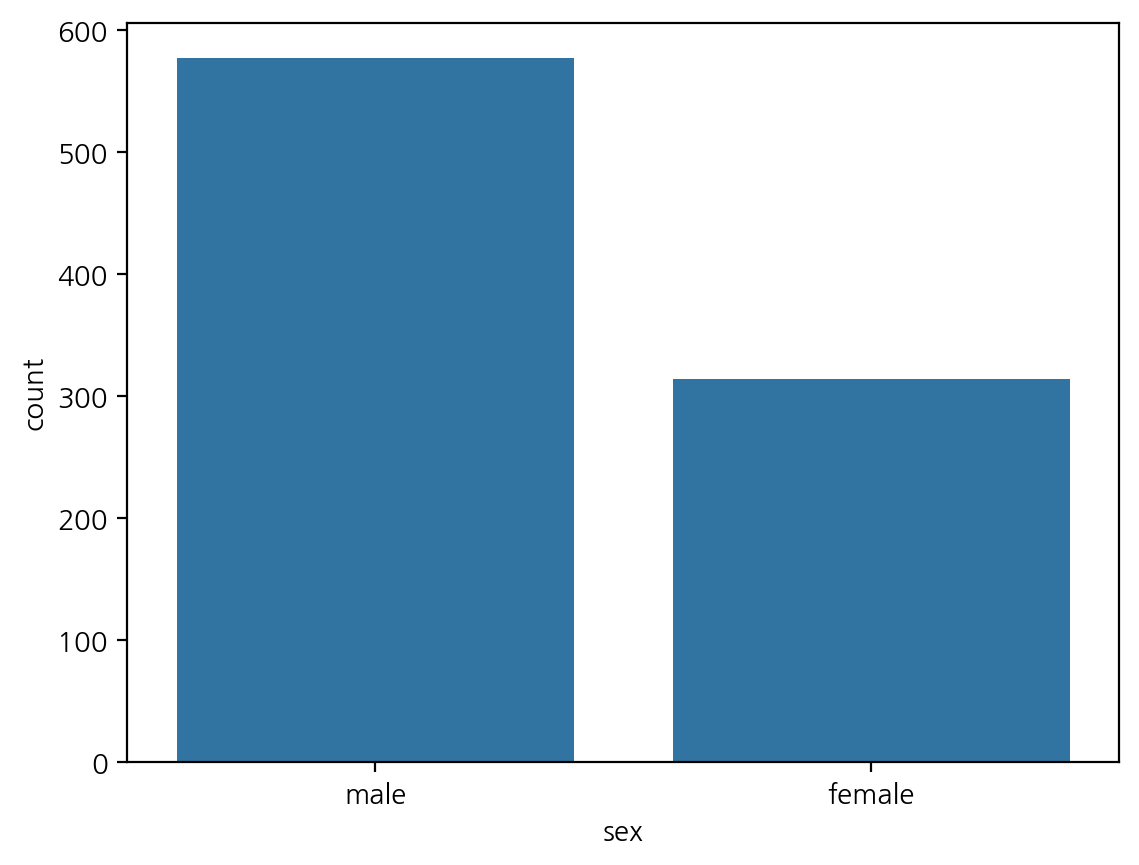

In [ ]:
sns.countplot(titanic, x='sex');

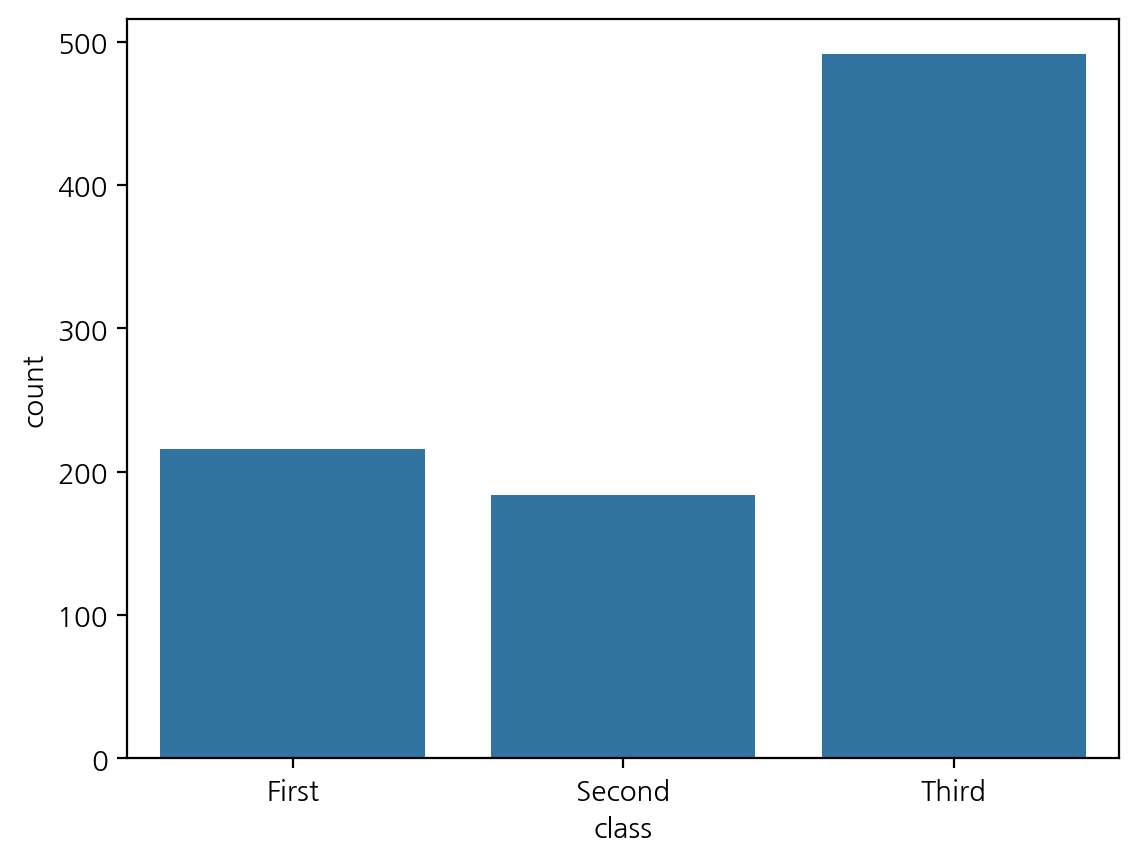

In [ ]:
sns.countplot(titanic, x = 'class');

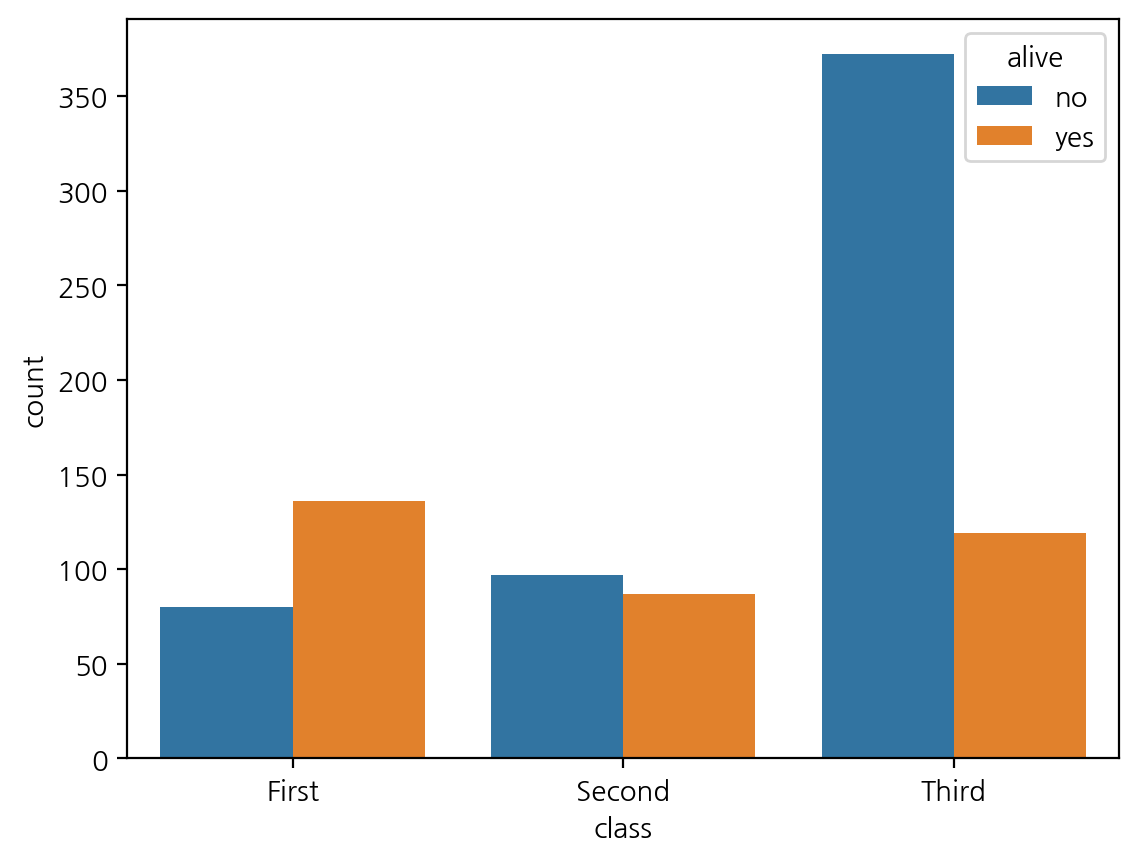

In [ ]:
sns.countplot(data = titanic, x = 'class', hue = 'alive');  # x축 class, alive별 색 표현

In [ ]:
titanic.groupby('sex').count()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
sex,,,,,,,,,,,,,,
female,314,314,261,314,314,314,312,314,314,314,97,312,314,314
male,577,577,453,577,577,577,577,577,577,577,106,577,577,577


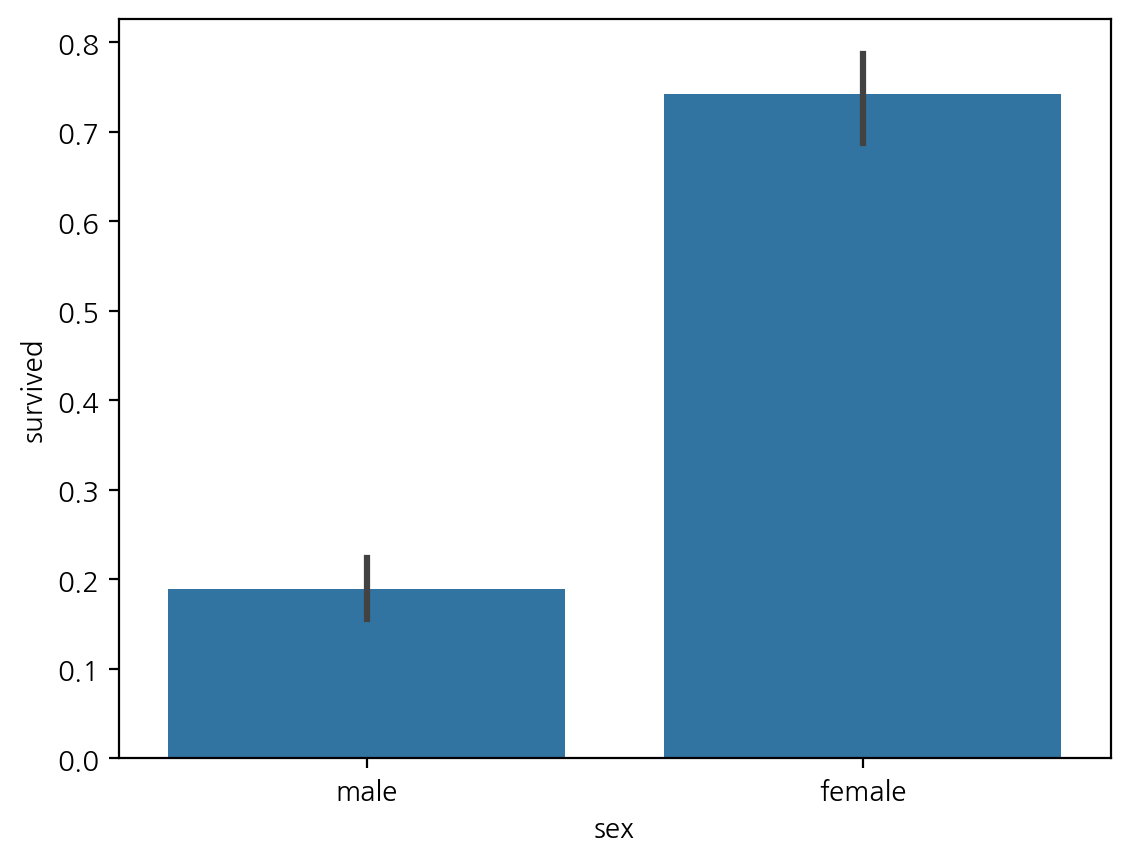

In [27]:
sns.barplot(data=titanic, x="sex", y="survived");

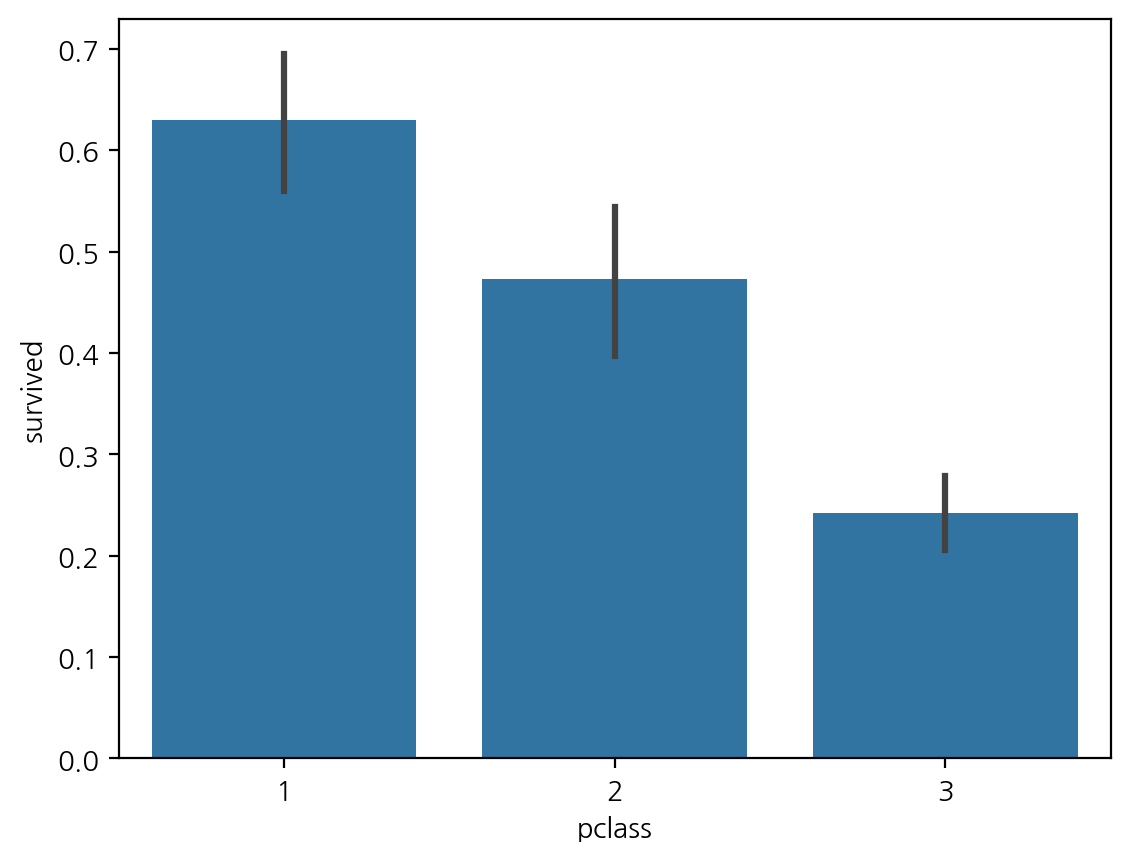

In [28]:
sns.barplot(x="pclass", y="survived", data=titanic);

## 샘플 데이터 패키지 활용

In [29]:
!pip install pydataset

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939417 sha256=0f5b32aac99482c8fecc2ed0243c3512e4b8a63be1aa47c77bcb6936ca079f4c
  Stored in directory: /root/.cache/pip/wheels/2b/83/5c/073c3755e8b7704e4677557b2055e61026c1a2342149214c13
Successfully built pydataset


In [30]:
import pydataset as pds
pds.data()

initiated datasets repo at: /root/.pydataset/


,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students
...,...,...
752,VerbAgg,Verbal Aggression item responses
753,cake,Breakage Angle of Chocolate Cakes
754,cbpp,Contagious bovine pleuropneumonia
755,grouseticks,Data on red grouse ticks from Elston et al. 2001


**Motor Trend Car Road Tests**

### Description
- The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models).

### Usage
- mtcars

### Format
- A data frame with 32 observations on 11 (numeric) variables.


> - [, 1]	mpg	Miles/(US) gallon
> - [, 2]	cyl	Number of cylinders
> - [, 3]	disp	Displacement (cu.in.)
> - [, 4]	hp	Gross horsepower
> - [, 5]	drat	Rear axle ratio
> - [, 6]	wt	Weight (1000 lbs)
> - [, 7]	qsec	1/4 mile time
> - [, 8]	vs	Engine (0 = V-shaped, 1 = straight)
> - [, 9]	am	Transmission (0 = automatic, 1 = manual)
> - [,10]	gear	Number of forward gears
> - [,11]	carb	Number of carburetors

In [31]:
df = pds.data('mtcars')  # mtcars 데이터를 df에 할당
df.info()               # df 출력

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 3.0+ KB


In [32]:
pds.data('mtcars', show_doc=True)

mtcars

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Motor Trend Car Road Tests

### Description

The data was extracted from the 1974 _Motor Trend_ US magazine, and comprises
fuel consumption and 10 aspects of automobile design and performance for 32
automobiles (1973–74 models).

### Usage

    mtcars

### Format

A data frame with 32 observations on 11 variables.

[, 1]

mpg

Miles/(US) gallon

[, 2]

cyl

Number of cylinders

[, 3]

disp

Displacement (cu.in.)

[, 4]

hp

Gross horsepower

[, 5]

drat

Rear axle ratio

[, 6]

wt

Weight (lb/1000)

[, 7]

qsec

1/4 mile time

[, 8]

vs

V/S

[, 9]

am

Transmission (0 = automatic, 1 = manual)

[,10]

gear

Number of forward gears

[,11]

carb

Number of carburetors

### Source

Henderson and Velleman (1981), Building multiple regression models
interactively. _Biometrics_, **37**, 391–411.

### Examples

    require(graphics)
    pairs(mtcars, main = "mtcars data")
    coplot(mpg ~ disp 

In [33]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


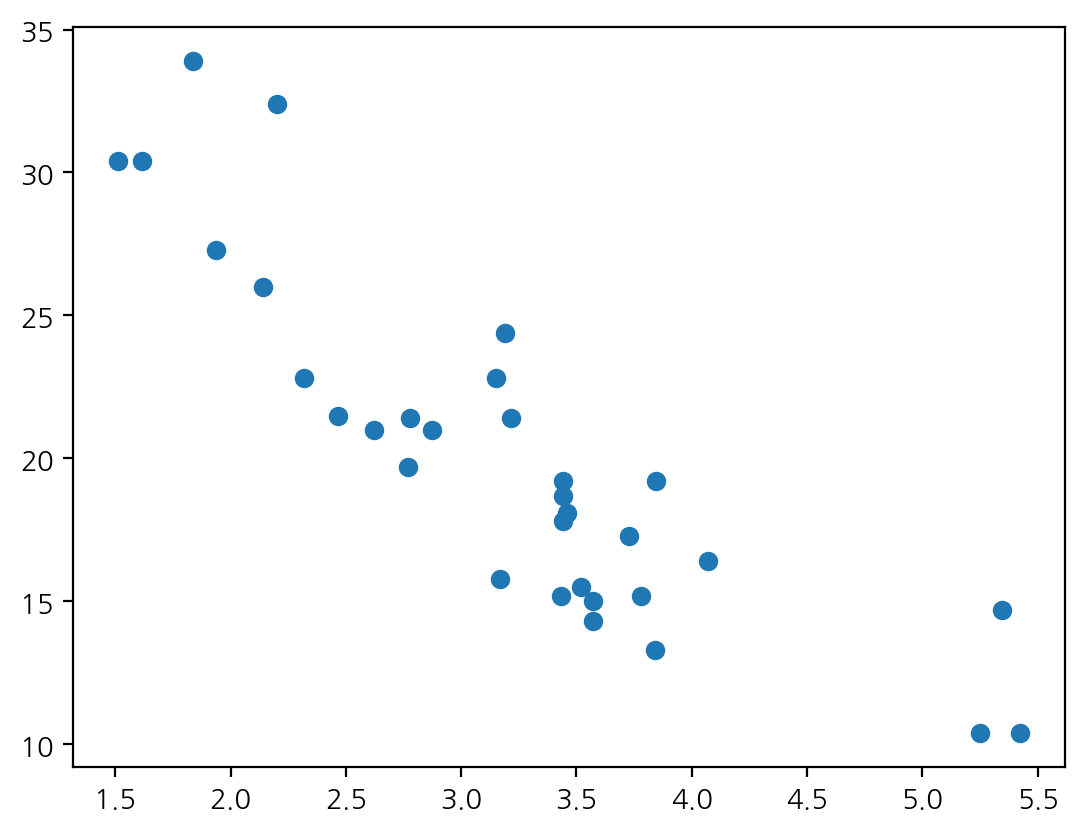

In [34]:
plt.scatter(x=df.wt, y=df.mpg);

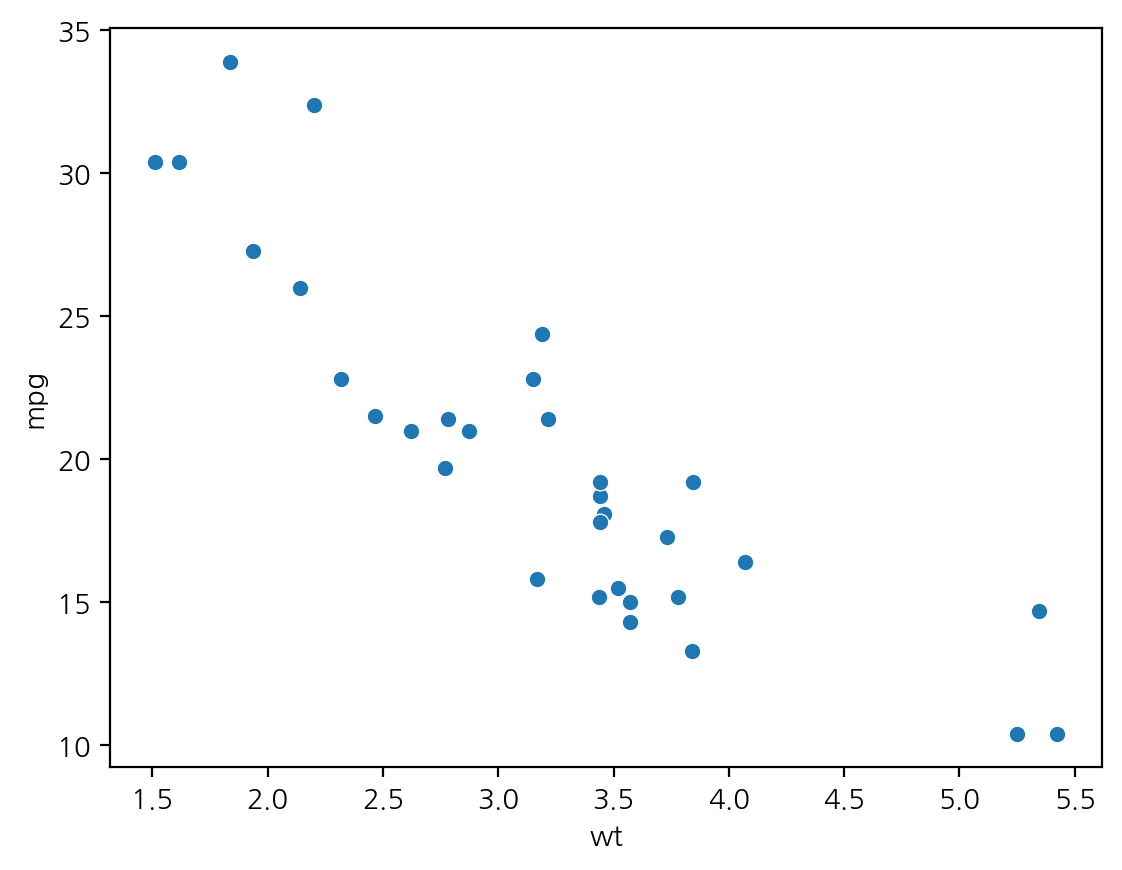

In [ ]:
sns.scatterplot(df, x=df.wt, y=df.mpg);

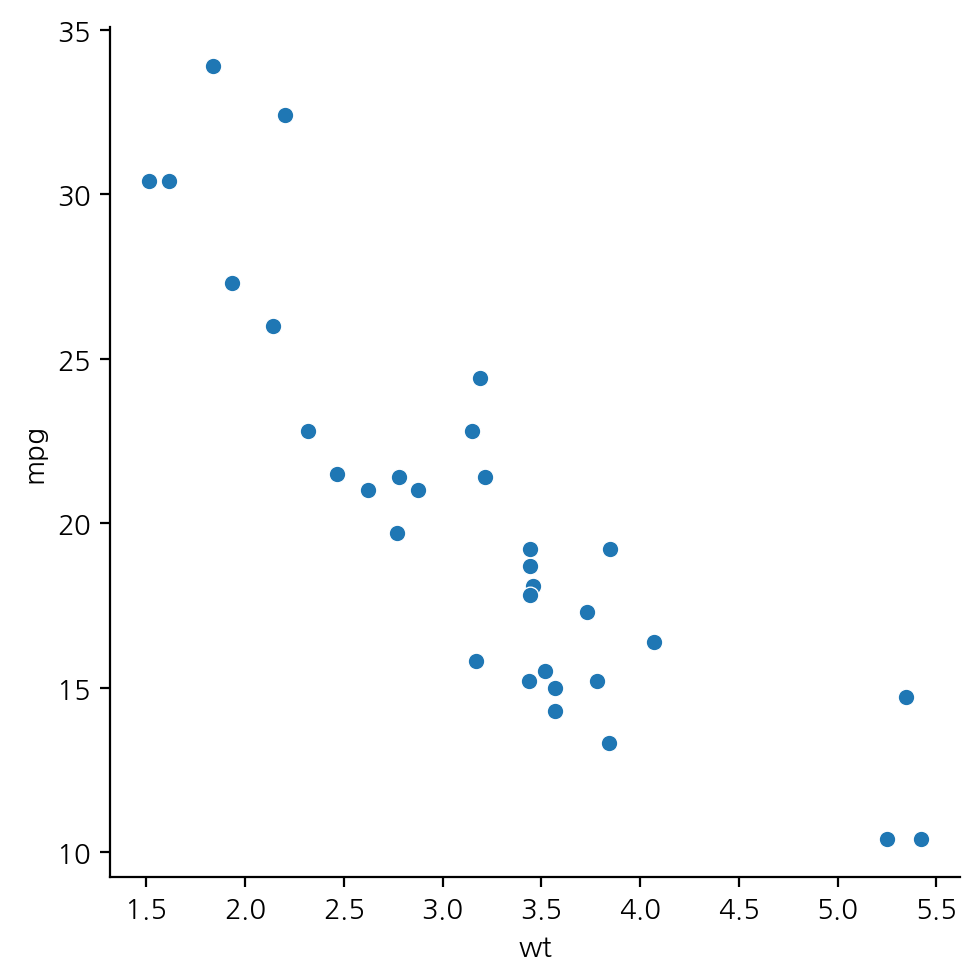

In [ ]:
sns.relplot(df, x=df.wt, y=df.mpg, kind="scatter");

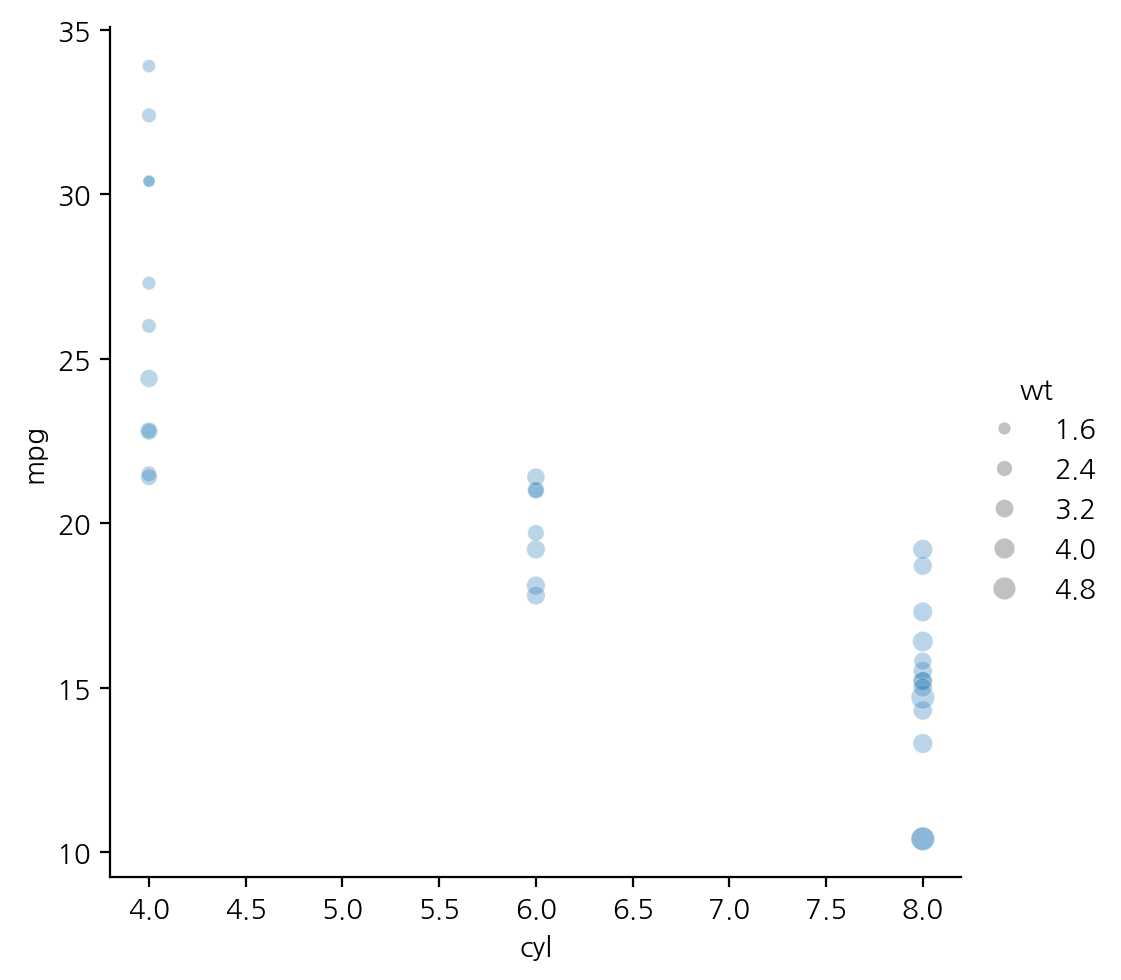

In [ ]:
sns.relplot(df, x=df.cyl, y=df.mpg, size=df.wt, kind="scatter", alpha=.3);